# Unsupervised Learning | Clustering (K-Means) | Case-study

## Customer / Marketing Segmentation [Clustering (K-Means)]

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Loading & Inspecting Data

In [4]:
# Load the data & check what's inside
mrkt = pd.read_csv ('Data/marketing-segmentation.csv')
mrkt.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [5]:
mrkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [6]:
mrkt.describe().round(1)

,Satisfaction,Loyalty
count,30.0,30.0
mean,6.4,0.0
std,2.6,1.0
min,1.0,-1.7
25%,4.2,-1.0
50%,7.0,0.2
75%,8.8,0.9
max,10.0,1.4


### Exploring Data

Text(0, 0.5, 'Loyalty')

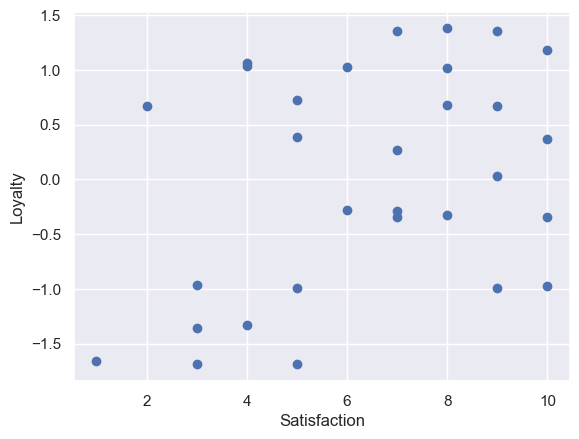

In [7]:
# We are creating a scatter plot of the two variables
plt.scatter(mrkt['Satisfaction'],mrkt['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [8]:
# Select both features by creating a copy of the data variable
X = mrkt.copy()

### Data Preprocessing

In [9]:
# Import a library which can do that easily
from sklearn import preprocessing

# Scale the inputs using 'preprocessing.scale()' which scales each variable (column in X) with respect to itself
x_scaled = preprocessing.scale(X)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### Model Training & Prediction

In [10]:
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

In [11]:
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(2)

In [12]:
# Fit the data
kmeans.fit(X)

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in

KMeans(n_clusters=2)

In [13]:
# Create a copy of the input data
clusters = X.copy()

In [14]:
# Take note of the predicted clusters
clusters['cluster_pred'] = kmeans.fit_predict(X)

Text(0, 0.5, 'Loyalty')

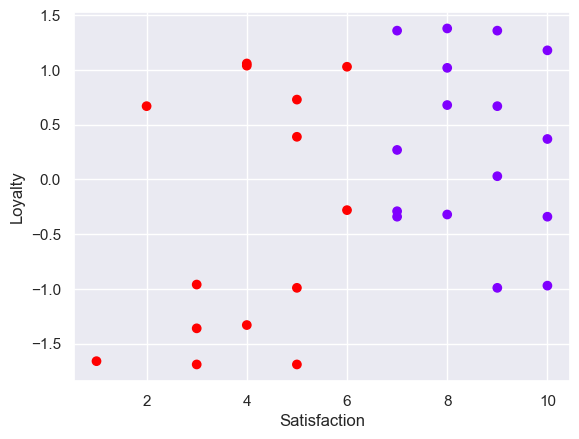

In [15]:
# Plot the data using the longitude and the latitude
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### Finding the Optimal Number of Clusters (Elbow / Knee Method)

In [16]:
# Createa an empty list
wcss =[]

# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)

# Check the result
wcss

[60.0,
 32.43692292542638,
 18.129659446063222,
 10.24718180592842,
 7.85810442178556,
 6.729951216531732,
 6.2415909639821106,
 5.554297406206645,
 4.511886779523419]

Text(0, 0.5, 'WCSS')

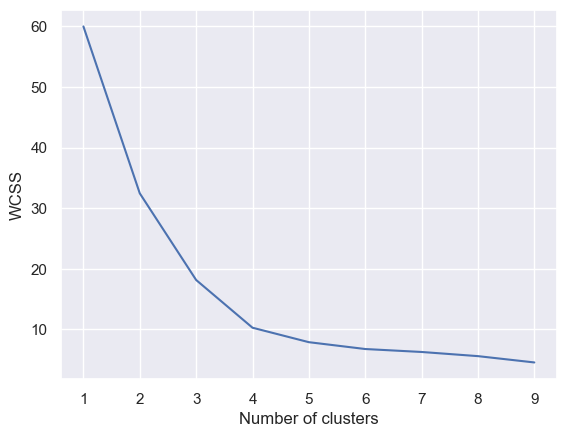

In [17]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)

# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [18]:
# Fiddle with K (the number of clusters)
kmeans_new = KMeans(5)

# Fit the data
kmeans_new.fit(x_scaled)

# Create a new data frame with the predicted clusters
clusters_new = X.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [19]:
# Check if everything seems right
clusters_new.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,4
2,5,-0.99,1
3,7,-0.29,4
4,4,1.06,3


Text(0, 0.5, 'Loyalty')

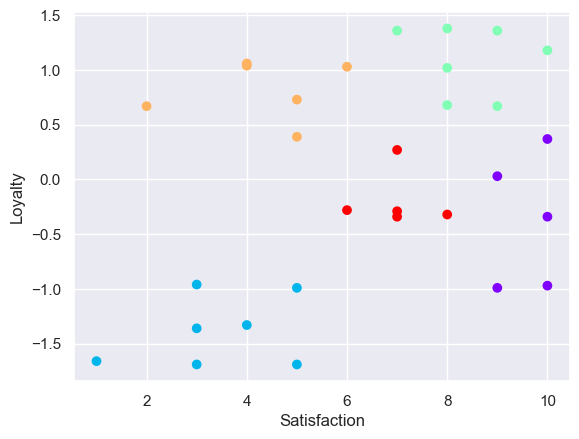

In [20]:
# Plotting the final clusters
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

==========

# GOOD LUCK!